In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn as sl
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv("House_Price.csv")

In [7]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
df.shape

(2930, 82)

In [9]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [11]:
# Find columns with missing value and their percent missing
df.isnull().sum()
miss_val = df.isnull().sum().sort_values(ascending = False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending = False), columns = ['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100))
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
Pool QC,2917,99.56
Misc Feature,2824,96.38
Alley,2732,93.24
Fence,2358,80.48
Fireplace Qu,1422,48.53
Lot Frontage,490,16.72
Garage Cond,159,5.43
Garage Finish,159,5.43
Garage Yr Blt,159,5.43
Garage Qual,159,5.43


In [12]:
# Drop colums with high missing values
df = df.drop(['Pool QC','Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis = 1)

In [13]:
# Drop rows with any missing values
df.dropna(inplace = True)

In [14]:
df.shape

(2218, 77)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


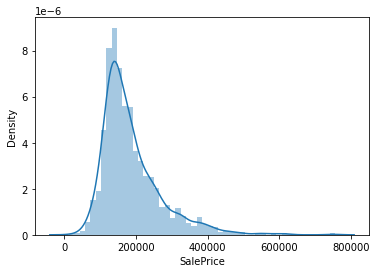

In [15]:
sns.distplot(df.SalePrice)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


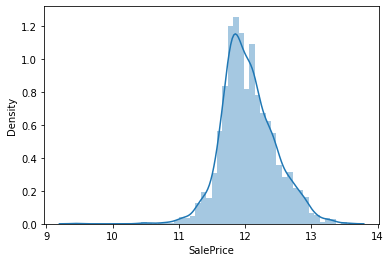

In [16]:
sns.distplot(np.log(df.SalePrice))

In [17]:
df['LogOfPrice'] = np.log(df.SalePrice)
df.drop(["SalePrice"], axis = 1, inplace = True)

In [18]:
df.skew().sort_values(ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Misc Val           24.120879
Pool Area          16.247816
Lot Area           15.657573
Low Qual Fin SF    13.983081
3Ssn Porch         12.185747
Kitchen AbvGr       5.905913
Enclosed Porch      4.264909
BsmtFin SF 2        4.036802
Bsmt Half Bath      3.882211
Screen Porch        3.802093
Mas Vnr Area        2.576649
Open Porch SF       2.336533
Total Bsmt SF       1.848097
BsmtFin SF 1        1.587211
Wood Deck SF        1.555763
Lot Frontage        1.520212
1st Flr SF          1.483183
Gr Liv Area         1.434337
MS SubClass         1.373792
Bsmt Unf SF         0.905737
2nd Flr SF          0.842968
Garage Area         0.812981
Overall Cond        0.802042
TotRms AbvGrd       0.798048
Fireplaces          0.725742
Half Bath           0.647430
Bsmt Full Bath      0.511302
Garage Cars         0.295756
Overall Qual        0.293296
LogOfPrice          0.206499
Mo Sold             0.173751
Yr Sold             0.152808
PID                 0.118297
Full Bath           0.076667
Bedroom AbvGr 

In [19]:
# Set the target and predictors
# Target
y = df.LogOfPrice 

# Use only those inputs features with numeric data type
df_temp = df.select_dtypes(include = ["int64", "float64"])

# Predictor
x = df_temp.drop(["LogOfPrice"], axis = 1)

In [20]:
# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 3)

In [21]:
lr = LinearRegression()
# Fit optimal linear regression line on training data, this performs gradient descent under the hood
lr.fit(x_train, y_train)

LinearRegression()

In [22]:
yr_hat = lr. predict(x_test)

In [23]:
# Evaluate the algorithm with a test set

# train test
lr_score = lr.score(x_test, y_test)
print("Accuracy: ", lr_score)

Accuracy:  0.8453924582164365


In [24]:
# Cross Validation to find 'validate' score across multiple samples, automatically does kfold stratifying
lr_cv = cross_val_score(lr, x, y, cv = 5, scoring = 'r2')
print("Cross_Validaton results: ", lr_cv)
print("R2: ", lr_cv.mean())

Cross_Validaton results:  [0.85680623 0.90402884 0.81442082 0.75830046 0.89098311]
R2:  0.8449078928132063
